# ANÁLISIS DE DATOS (1INF03) - LABORATORIO 1

(09/04/2022)

---







**Clientes bancarizados**

En este laboratorio contaremos con un dataset cuya información representa  a la tenencia de activos y datos sociodemográficos de clientes que realizaron movimientos bancarios durante los meses de Enero, Febrero y Marzo del año 2018. Asumiendo que actualmente estamos iniciando el mes de Abril del mismo año, deseamos analizar las características del último movimiento de cada cliente en este primer trimestre del año 2018. El presente datset cuenta con información de las siguientes variables: 

VARIABLE | DESCRIPCION
--------|-------------
MES | Mes del movimiento bancario
IDENTIFICADOR | Identificador del cliente bancarizado
CLIENTE_TC | Tenencia de una tarjeta de crédito
CLIENTE_VEH | Tenencia de un crédito vehicular 
CLIENTE_HIP | Tenencia de un crédito hipotecario
CLIENTE_PP | Tenencia de un préstamo personal
EDAD | Edad del cliente
INGRESO_BRUTO | Ingresos mensuales del cliente
TIPO_CLIENTE | Tipo de actividad laboral
DEPARTAMENTO | Departamento de residencia

* El objetivo de este laboratorio es aprender a identificar las variables 
en un dataset y describir la información contenida en el mismo.

---





# Librerías
Uno de los primeros pasos que a menudo realizaremos es la carga de las librerías de python que se usan al momento de analizar un dataset. Por ejemplo *pandas*, que sirve para cargar archivos de datos y realizar operaciones sobre ellos. Otro ejemplo de librerías es matplotlib o *seaborn*, ambas muy usadas para realizar visualizaciones sobre los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargando el DataSet
En esta sección realizaremos la carga del archivo de datos que usaremos para nuestro análisis. 

In [2]:
working_dir = "G:/Mi unidad/Colab Notebooks/Laboratorios/lab-01"
%cd $working_dir 

G:\Mi unidad\Colab Notebooks\Laboratorios\lab-01


In [3]:
!pwd 

/g/Mi unidad/Colab Notebooks/Laboratorios/lab-01


# Importando el dataset con Pandas y revisando los datos
Pandas es una librería con diversas funcionalidades para tratar archivos de diferente tipo: csv, txt, json, xml, etc. Y en todos los casos, la data es cargada a un tipo de objeto llamado [Dataframe](https://pandas.pydata.org/docs/reference/frame.html) y sobre el cual se pueden realizar diversas operaciones sobre filas y columnas. 

En nuestro caso, el archivo de datos que usaremos es de tipo csv y para ello usaremos la funcion [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [4]:
datos = pd.read_csv('TABLE_V0.csv', sep=',')

In [5]:
datos.head()

,MES,IDENTIFICADOR,CLIENTE_TC,CLIENTE_VEH,CLIENTE_HIP,CLIENTE_PP,EDAD,INGRESO_BRUTO,TIPO_CLIENTE,DEPARTAMENTO
0,201802,120149287,0,0,0,0,NaN,NaN,INF. NO DISPONIBLE,HUANUCO
1,201803,144280398,0,0,0,0,NaN,NaN,INF. NO DISPONIBLE,CAJAMARCA
2,201802,104231747,0,0,0,1,41.0,1571.0,DEPENDIENTE,LIMA
3,201802,22861718,0,0,0,0,75.0,NaN,INDEPENDIENTE,LIMA
4,201802,17555111,0,0,0,0,NaN,NaN,INF. NO DISPONIBLE,UCAYALI


In [6]:
datos.dtypes

MES                int64
IDENTIFICADOR      int64
CLIENTE_TC         int64
CLIENTE_VEH        int64
CLIENTE_HIP        int64
CLIENTE_PP         int64
EDAD             float64
INGRESO_BRUTO    float64
TIPO_CLIENTE      object
DEPARTAMENTO      object
dtype: object

In [7]:
datos["DEPARTAMENTO"] = datos["DEPARTAMENTO"].astype('string')
datos.dtypes

# De ahora en adelante, podemos realizar los cálculos necesarios con las variables del dataset,
# pues estas se encuentran en el formato/type adecuado

MES                int64
IDENTIFICADOR      int64
CLIENTE_TC         int64
CLIENTE_VEH        int64
CLIENTE_HIP        int64
CLIENTE_PP         int64
EDAD             float64
INGRESO_BRUTO    float64
TIPO_CLIENTE      object
DEPARTAMENTO      string
dtype: object

In [8]:
datos.describe()

,MES,IDENTIFICADOR,CLIENTE_TC,CLIENTE_VEH,CLIENTE_HIP,CLIENTE_PP,EDAD,INGRESO_BRUTO
count,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,143890.000000,135405.000000
mean,201801.979340,9.207955e+07,0.418920,0.011200,0.023700,0.230000,43.926993,2714.399927
std,0.818435,4.709377e+07,0.493383,0.105236,0.152113,0.420833,13.930881,3149.216071
min,201801.000000,1.836700e+04,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,201801.000000,5.223791e+07,0.000000,0.000000,0.000000,0.000000,33.000000,1382.000000
50%,201802.000000,9.427136e+07,0.000000,0.000000,0.000000,0.000000,42.000000,1669.000000
75%,201803.000000,1.323596e+08,1.000000,0.000000,0.000000,0.000000,53.000000,2783.000000
max,201803.000000,1.715883e+08,1.000000,1.000000,1.000000,1.000000,97.000000,137569.000000


# **Pregunta 1**: 

Construir una matriz de datos que contenga solo el último movimiento de cada cliente en el primer trimestre del año 2018. Para fines del presente Laboratorio, excluir todas las filas que contengan celdas vacías y omitir las filas duplicadas. (4 punto)


In [19]:
# Omitimos filas duplicadas, en base a todas las columnas
datos.drop_duplicates(inplace=True)

# Contabilizamos las celdas vacías, antes de eliminarlas
vacios = pd.DataFrame(datos.isnull().sum()).sort_values(0, ascending=True)
vacios.columns = ['vacios']
vacios['vacios%'] = round(100 * vacios['vacios']/datos.shape[0], 2)
print(vacios)

# Excluímos las filas que contengan alguna celda vacía
print(datos.shape) 
datos.dropna(inplace=True)
print(datos.shape)

# Filtramos en base a los meses del primer trimestre
filtro_mes = datos[datos["MES"] < 201805]

# Ordenamos el mes de mayor a menor, para eliminar los duplicados
# asociados a meses más tempranos
filtro_mes.sort_values(by=['MES'], inplace=True, ascending = False)
print(filtro_mes.head())

# Cantidad de personas con más de un movimiento registrado
print(sum(filtro_mes.IDENTIFICADOR.value_counts() > 1))

# Descartamos los duplicados asociados a meses más tempranos
print(filtro_mes.shape)
filtro_mes.drop_duplicates(subset ="IDENTIFICADOR", inplace = True)
print(sum(filtro_mes.IDENTIFICADOR.value_counts() > 1))
print(filtro_mes.shape)

               vacios  vacios%
MES                 0      0.0
IDENTIFICADOR       0      0.0
CLIENTE_TC          0      0.0
CLIENTE_VEH         0      0.0
CLIENTE_HIP         0      0.0
CLIENTE_PP          0      0.0
EDAD                0      0.0
INGRESO_BRUTO       0      0.0
TIPO_CLIENTE        0      0.0
DEPARTAMENTO        0      0.0
(26885, 10)
(26885, 10)
          MES  IDENTIFICADOR  CLIENTE_TC  CLIENTE_VEH  CLIENTE_HIP  \
25022  201803      168227841           0            0            0   
24581  201803       47457181           0            0            0   
24478  201803       21373736           0            0            0   
24484  201803       98264808           1            0            0   
24505  201803       35953293           1            1            0   

       CLIENTE_PP  EDAD  INGRESO_BRUTO   TIPO_CLIENTE DEPARTAMENTO  
25022           0  45.0         1402.0  INDEPENDIENTE    CAJAMARCA  
24581           0  45.0         2091.0    DEPENDIENTE         PUNO  
24478  

## **Respuesta 1** 

La variable _filtro\_mes_ es la matriz de datos solicitada.

# **Pregunta 2** 

¿Cuál es el departamento que presenta la menor dispersión en la distribución de la variable INGRESO_BRUTO ? (3 punto)

In [10]:
# Para medir dispersión, es relevante considerar la cantidad de valores atípicos
# en cada columna. Sin embargo, por ahora, en la teoría solo se nos ha presentado
# el coeficiente de variación como manera de comparar dispersión entre variables
# diferentes, así que lo calcularé de esa manera, sin tratar previamenete a los atípicos

# Coeficiente de variación
agrupar_por_depa = filtro_mes.groupby(["DEPARTAMENTO"])
agrupar_por_depa = agrupar_por_depa["INGRESO_BRUTO"].std() / agrupar_por_depa["INGRESO_BRUTO"].mean()
agrupar_por_depa.sort_values()

DEPARTAMENTO
HUANCAVELICA          0.566122
PUNO                  0.747966
LORETO                0.758495
MOQUEGUA              0.759328
SAN MARTIN            0.773883
PASCO                 0.806222
JUNIN                 0.820604
CAJAMARCA             0.875950
ICA                   0.878764
TUMBES                0.902146
CALLAO                0.914761
ANCASH                0.916718
AMAZONAS              0.923213
CUSCO                 0.950425
LAMBAYEQUE            0.958471
LA LIBERTAD           0.964551
UCAYALI               0.971266
APURIMAC              0.976009
TACNA                 0.993408
AREQUIPA              0.993442
PIURA                 0.997767
INF. NO DISPONIBLE    1.009223
AYACUCHO              1.028379
HUANUCO               1.035119
MADRE DE DIOS         1.082028
LIMA                  1.240085
Name: INGRESO_BRUTO, dtype: float64

## **Respuesta 2** 

Por lo tanto, podemos concluir (parcialmente) que el departamento **Huancavelica**\
es aquel que presenta menor dispersión en la distribución de ingresos brutos,\
pues, a menor coeficiente de variación, mayor homogeneidad de la distribución.

# **Pregunta 3** 

¿Cuál es la mediana del sueldo y de la edad de los clientes bancarizados, según el mes de su último movimiento? (2.5 punto)

In [11]:
# Mediana del sueldo
print(filtro_mes.INGRESO_BRUTO.median())

# Mediana de la edad
print(filtro_mes.EDAD.median())

1679.0
42.0



## **Respuesta 3**

### Aclaración

Note que en este documento no se presenta la unidad monetaria con la cual se ha\
medido el ingreso bruto. Así que, simplemente denotemos aquella unidad por $\mu$

**Mediana pedida sobre el sueldo:** $1679.0 \; \mu$ 

**Mediana pedida sobre la edad:** $42$ años

# **Pregunta 4** 

¿Cuál de las cuatro variables de tenencia de activos es la que presenta la distribución más homogénea en la muestra? (2.5 punto)

In [12]:
# Para comparar distribuciones, la más homogénea es aquella que presenta un menor
# coeficiente de variación (asumiré lo mismo que en la pregunta 2 respecto a los valores atípicos)
print(filtro_mes.dtypes)

# Recordemos que las variables respecto a tenencia de activos son
# CLIENTE_TC, CLIENTE_VEH, CLIENTE_HIP, CLIENTE_PP,
# todas variables cuantitativas

# Calculamos el coeficiente de variación
cv_tenencia_activos = filtro_mes[["CLIENTE_TC", "CLIENTE_VEH", "CLIENTE_HIP", "CLIENTE_PP"]].std() / filtro_mes[["CLIENTE_TC", "CLIENTE_VEH", "CLIENTE_HIP", "CLIENTE_PP"]].mean()
cv_tenencia_activos.sort_values()

MES                int64
IDENTIFICADOR      int64
CLIENTE_TC         int64
CLIENTE_VEH        int64
CLIENTE_HIP        int64
CLIENTE_PP         int64
EDAD             float64
INGRESO_BRUTO    float64
TIPO_CLIENTE      object
DEPARTAMENTO      string
dtype: object


CLIENTE_TC     0.605878
CLIENTE_PP     1.244560
CLIENTE_HIP    4.802380
CLIENTE_VEH    7.106603
dtype: float64

## **Respuesta 4** 

La variable **CLIENTE\_TC** es la que presenta una distribución más homogénea en la muestra,\
entre las variables de tenencia de activos.

# **Pregunta 5:** 

Responda a las siguientes preguntas respecto a la variable INGRESO_BRUTO. (4 puntos)

- Realice un análisis descriptivo de la variable INGRESO_BRUTO (de manera cuantitativa y gráfica)



MES                int64
IDENTIFICADOR      int64
CLIENTE_TC         int64
CLIENTE_VEH        int64
CLIENTE_HIP        int64
CLIENTE_PP         int64
EDAD             float64
INGRESO_BRUTO    float64
TIPO_CLIENTE      object
DEPARTAMENTO      string
dtype: object
0.25    1392.0
0.50    1679.0
0.75    2783.0
Name: INGRESO_BRUTO, dtype: float64
1391.0


array([[<AxesSubplot:title={'center':'INGRESO_BRUTO'}>]], dtype=object)

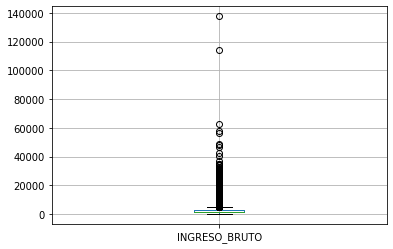

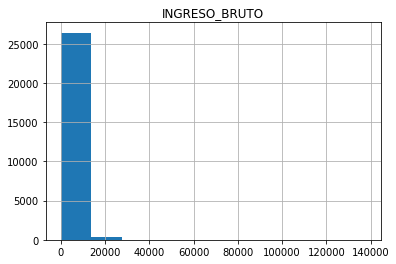

In [13]:
print(filtro_mes.dtypes)
# Se ha registrado el ingreso bruto como un valor real (float64)

# Diagrama de caja
filtro_mes.boxplot(column = "INGRESO_BRUTO")
# Como notamos del boxplot del ingreso bruto, se observa una gran cantidad de valores atípicos.

# Calculemos entonces sus medidas (apropiadas) de tendencia central y dispersión
print(filtro_mes.INGRESO_BRUTO.quantile([0.25, 0.50, 0.75]))
print(filtro_mes.INGRESO_BRUTO.quantile(0.75) - filtro_mes.INGRESO_BRUTO.quantile(0.25))

# Medida de tendencia central: Mediana de 1679.0 \mu
# Medida de dispersión: Rango intercuartil de 1391.0 \mu

# Histograma
filtro_mes.hist(column = "INGRESO_BRUTO")

- Calcule los coeficientes de deformación de la variable INGRESO_BRUTO. Identifique cuáles serían las mejores medidas de resumen y de variabilidad, e indique por qué.

In [14]:
# Coeficiente de asimetría
print(filtro_mes['INGRESO_BRUTO'].skew())
# Este es positivo, así que se observa una cola jalada hacia la derecha.

# Coeficiente de curtosis
print(filtro_mes['INGRESO_BRUTO'].kurt())
# La distribución no se asemeja a una distribución normal (gaussiana)

# Como hay varios valores atípicos presentes en la variable, la mejor medida de resumen
# es la mediana (la media se sesga por valores atípicos); y, la mejor de medida de variabilidad
# es el rango intercuartilr (la desviación estándar y varianza se sesgan por valores atípicos);
# esto ya que ambas variables no se ven tan afectadas ante la presencia de valores atípicos en la data.

8.654743833658051
216.24024483970854


- ¿Cuál es el ingreso bruto de la persona que supera el 70% de las personas con menores ingresos?

In [15]:
# Se nos pide el cuantil 0.7
print(filtro_mes.INGRESO_BRUTO.quantile(0.7))

# El ingreso bruto de la persona que supera el 70% de las personas con menores ingresos
# es de 2470.0 \mu .

2470.0


# **Pregunta 6** 

Mediante un análisis comparativo de la distribución marginal y distribución condicional de las variables EDAD y TIPO_CLIENTE, valide la siguiente hipótesis del negocio "La variable EDAD y TIPO_CLIENTE están asociadas. La variable EDAD tiene un comportamiento diferente en aquellos clientes de tipo INDEPENDIENTE respecto a aquellos de tipo DEPENDIENTES". Interprete y describa sus resultados. (4 puntos) 

43.35499047832418


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


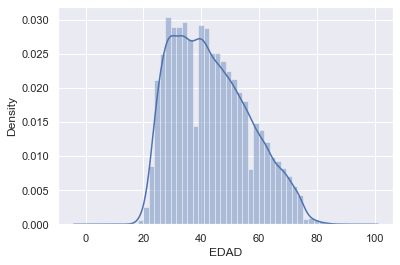

['INDEPENDIENTE' 'DEPENDIENTE']
43.79576712035915


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


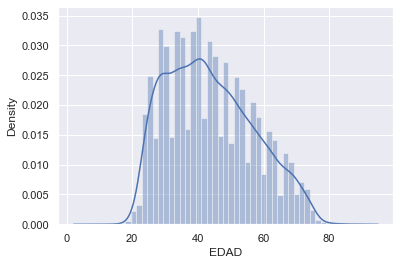

42.869783495450264


C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


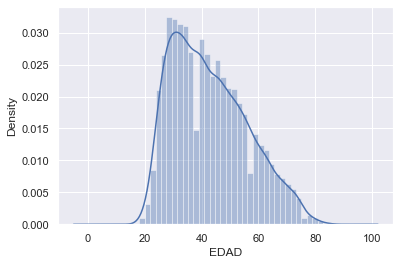

C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

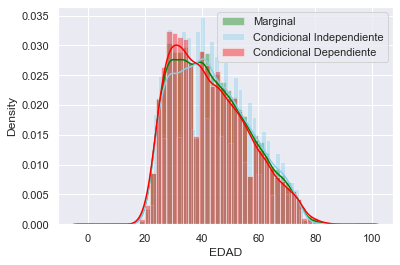

In [16]:
# Note que la variable EDAD es cuantitativa y la variable TIPO_CLIENTE es cualitativa,
# así que el análisis marginal será respecto a EDAD
filtro_mes[["EDAD","TIPO_CLIENTE"]].head(10)

# Distribución marginal
print(filtro_mes.EDAD.mean())
sns.set(style="darkgrid")
sns.distplot(filtro_mes["EDAD"])
plt.show()

# Distribución condicional

# Categorías
print(filtro_mes.TIPO_CLIENTE.unique())

# Caso "INDEPENDIENTE"
print(filtro_mes[filtro_mes['TIPO_CLIENTE']=='INDEPENDIENTE'].EDAD.mean())
sns.set(style="darkgrid")
sns.distplot(filtro_mes[filtro_mes['TIPO_CLIENTE']=='INDEPENDIENTE'].EDAD)
plt.show()

# Caso "DEPENDIENTE"
print(filtro_mes[filtro_mes['TIPO_CLIENTE']=='DEPENDIENTE'].EDAD.mean())
sns.set(style="darkgrid")
sns.distplot(filtro_mes[filtro_mes['TIPO_CLIENTE']=='DEPENDIENTE'].EDAD)
plt.show()

# Comparación 
sns.set(style="darkgrid")
sns.distplot(filtro_mes["EDAD"], color="green", label="Marginal", kde=True)
sns.distplot(filtro_mes[filtro_mes['TIPO_CLIENTE']=='INDEPENDIENTE'].EDAD, color="skyblue", label="Condicional Independiente", kde=True)
sns.distplot(filtro_mes[filtro_mes['TIPO_CLIENTE']!='INDEPENDIENTE'].EDAD, color="red", label="Condicional Dependiente", kde=True)
plt.legend() 
plt.show()

## **Respuesta 6** 

Como las distribuciones condicionales graficadas son muy similares a la distribución marginal asociada,\
además que la media de la edad resulta casi la misma comparando los tres casos (marginal y dos condicionales)\,
concluimos que la variable **EDAD** y **TIPO_CLIENTE** \
**NO** están asociadas; por lo menos respecto
a la muestra filtrada con la que se ha trabajado en este laboratorio.